[nltk_data] Downloading package punkt to /Users/goswami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/goswami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


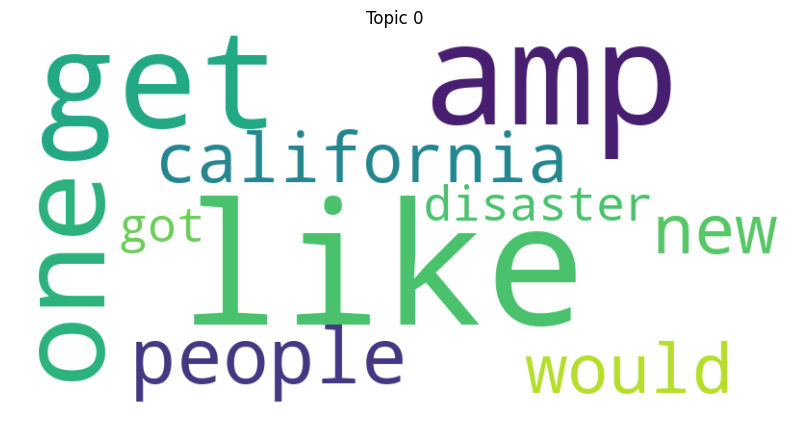

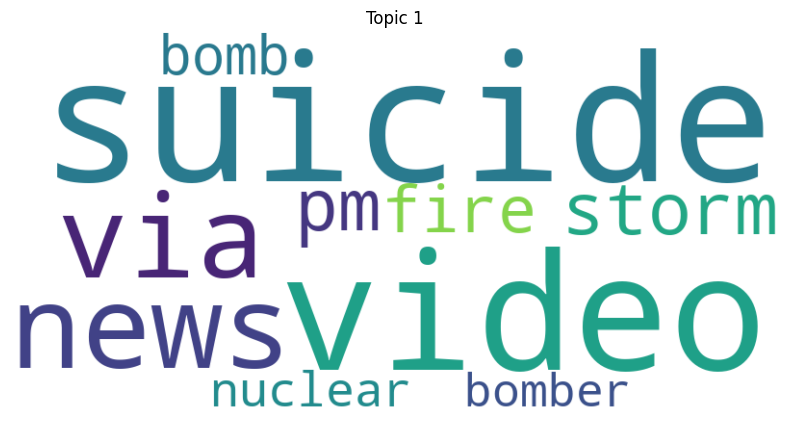

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Read the CSV file
data = pd.read_csv('train.csv')

# Extract the 'text' column
text_data = data['text']

# Preprocess the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    return filtered_tokens

# Apply text preprocessing
preprocessed_text = text_data.apply(preprocess_text)

# Create a dictionary
dictionary = corpora.Dictionary(preprocessed_text)

# Create a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in preprocessed_text]

# Perform topic modeling using LDA
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

# Generate word cloud for the dominant topics
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Extract topics and their weights
topics = lda_model.show_topics(num_topics=2, formatted=False)

# Display word clouds for each topic
for topic_id, words in topics:
    topic_words = dict(words)
    wordcloud.generate_from_frequencies(topic_words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()
